In [1]:
#-*- coding: utf-8 -*-

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#이미지가 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.7053  g_loss:0.6912
epoch:1  d_loss:0.4624  g_loss:0.3282
epoch:2  d_loss:0.5685  g_loss:0.1025
epoch:3  d_loss:0.6585  g_loss:0.0836
epoch:4  d_loss:0.5768  g_loss:0.1651
epoch:5  d_loss:0.5088  g_loss:0.4210
epoch:6  d_loss:0.4876  g_loss:0.6972
epoch:7  d_loss:0.5092  g_loss:0.8697
epoch:8  d_loss:0.4966  g_loss:0.8970
epoch:9  d_loss:0.4860  g_loss:0.8720
epoch:10  d_loss:0.4173  g_loss:0.7869
epoch:11  d_loss:0.4385  g_loss:0.8098
epoch:12  d_loss:0.4813  g_loss:0.8665
epoch:13  d_loss:0.4735  g_loss:0.9191
epoch:14  d_loss:0.5689  g_loss:0.9725
epoch:15  d_loss:0.4707  g_loss:1.0498
epoch:16  d_loss:0.4008  g_loss:1.0505
epoch:17  d_loss:0.6223  g_loss:0.7720
epoch:18  d_loss:0.5659  g_loss:0.6378
epoch:19  d_loss:0.4575  g_loss:0.7249
epoch:20  d_loss:0.4221  g_loss:0.8080
epoch:21  d_loss:0.5017  g_loss:0.8385
epoch:22  d_loss:0.5141  g_loss:0.6779
epoch:23  d_loss:0.4558  g_loss:0.6296
epoch:24  d_loss:0.4512  g_loss:0.6727
epoch:25  d_loss:0.4671  g_loss:0.7

epoch:209  d_loss:0.5071  g_loss:1.3111
epoch:210  d_loss:0.6273  g_loss:1.3449
epoch:211  d_loss:0.4608  g_loss:1.5629
epoch:212  d_loss:0.5522  g_loss:1.7000
epoch:213  d_loss:0.5885  g_loss:1.8209
epoch:214  d_loss:0.5494  g_loss:1.2550
epoch:215  d_loss:0.4116  g_loss:1.6143
epoch:216  d_loss:0.4686  g_loss:1.6146
epoch:217  d_loss:0.4041  g_loss:1.3918
epoch:218  d_loss:0.4094  g_loss:2.0719
epoch:219  d_loss:0.4611  g_loss:2.1282
epoch:220  d_loss:0.4331  g_loss:1.9419
epoch:221  d_loss:0.4715  g_loss:1.9731
epoch:222  d_loss:0.4907  g_loss:1.7782
epoch:223  d_loss:0.5330  g_loss:1.4919
epoch:224  d_loss:0.5321  g_loss:1.6592
epoch:225  d_loss:0.4569  g_loss:1.8847
epoch:226  d_loss:0.4499  g_loss:1.9169
epoch:227  d_loss:0.5436  g_loss:2.2231
epoch:228  d_loss:0.4046  g_loss:1.9330
epoch:229  d_loss:0.4270  g_loss:1.6878
epoch:230  d_loss:0.4849  g_loss:1.8165
epoch:231  d_loss:0.5436  g_loss:1.7599
epoch:232  d_loss:0.5080  g_loss:1.9019
epoch:233  d_loss:0.6281  g_loss:1.9224


epoch:415  d_loss:0.2733  g_loss:2.3414
epoch:416  d_loss:0.3568  g_loss:2.1081
epoch:417  d_loss:0.3392  g_loss:2.2630
epoch:418  d_loss:0.4569  g_loss:1.7046
epoch:419  d_loss:0.2981  g_loss:2.4755
epoch:420  d_loss:0.2857  g_loss:1.9811
epoch:421  d_loss:0.3921  g_loss:2.0003
epoch:422  d_loss:0.3170  g_loss:1.8507
epoch:423  d_loss:0.4359  g_loss:1.6780
epoch:424  d_loss:0.4184  g_loss:1.8717
epoch:425  d_loss:0.2499  g_loss:2.2926
epoch:426  d_loss:0.3711  g_loss:2.7302
epoch:427  d_loss:0.3210  g_loss:2.1900
epoch:428  d_loss:0.4116  g_loss:2.6761
epoch:429  d_loss:0.4164  g_loss:2.6568
epoch:430  d_loss:0.4567  g_loss:2.2518
epoch:431  d_loss:0.3729  g_loss:2.2837
epoch:432  d_loss:0.5085  g_loss:1.8561
epoch:433  d_loss:0.3070  g_loss:2.3446
epoch:434  d_loss:0.3801  g_loss:2.2831
epoch:435  d_loss:0.3985  g_loss:2.0186
epoch:436  d_loss:0.3888  g_loss:2.0680
epoch:437  d_loss:0.3817  g_loss:2.2151
epoch:438  d_loss:0.3421  g_loss:1.9953
epoch:439  d_loss:0.2352  g_loss:2.7912


epoch:620  d_loss:0.2059  g_loss:2.2177
epoch:621  d_loss:0.2288  g_loss:2.2256
epoch:622  d_loss:0.2305  g_loss:1.7959
epoch:623  d_loss:0.3556  g_loss:1.5557
epoch:624  d_loss:0.2079  g_loss:2.0425
epoch:625  d_loss:0.2264  g_loss:2.9310
epoch:626  d_loss:0.2833  g_loss:2.3727
epoch:627  d_loss:0.2552  g_loss:1.8908
epoch:628  d_loss:0.1578  g_loss:2.0069
epoch:629  d_loss:0.1777  g_loss:2.3373
epoch:630  d_loss:0.2190  g_loss:2.3063
epoch:631  d_loss:0.1556  g_loss:2.8700
epoch:632  d_loss:0.2603  g_loss:2.3388
epoch:633  d_loss:0.3878  g_loss:2.2169
epoch:634  d_loss:0.2550  g_loss:1.8066
epoch:635  d_loss:0.2406  g_loss:2.0267
epoch:636  d_loss:0.2972  g_loss:1.7540
epoch:637  d_loss:0.3813  g_loss:1.9192
epoch:638  d_loss:0.2658  g_loss:1.7956
epoch:639  d_loss:0.3180  g_loss:1.3520
epoch:640  d_loss:0.2979  g_loss:2.0652
epoch:641  d_loss:0.4573  g_loss:1.7076
epoch:642  d_loss:0.3109  g_loss:1.6249
epoch:643  d_loss:0.2979  g_loss:1.7106
epoch:644  d_loss:0.4651  g_loss:1.5730


epoch:825  d_loss:0.4078  g_loss:2.2266
epoch:826  d_loss:0.3851  g_loss:2.1164
epoch:827  d_loss:0.3222  g_loss:1.8187
epoch:828  d_loss:0.3077  g_loss:2.4709
epoch:829  d_loss:0.4187  g_loss:2.4926
epoch:830  d_loss:0.3449  g_loss:2.4544
epoch:831  d_loss:0.4862  g_loss:2.1726
epoch:832  d_loss:0.3334  g_loss:2.1964
epoch:833  d_loss:0.4176  g_loss:2.1528
epoch:834  d_loss:0.5018  g_loss:2.0789
epoch:835  d_loss:0.5861  g_loss:2.0394
epoch:836  d_loss:0.5975  g_loss:2.0199
epoch:837  d_loss:0.4894  g_loss:1.5535
epoch:838  d_loss:0.6048  g_loss:1.5836
epoch:839  d_loss:0.6046  g_loss:1.5524
epoch:840  d_loss:0.7867  g_loss:1.3962
epoch:841  d_loss:0.6663  g_loss:1.4585
epoch:842  d_loss:0.5949  g_loss:1.7729
epoch:843  d_loss:0.4150  g_loss:1.5361
epoch:844  d_loss:0.6703  g_loss:1.1888
epoch:845  d_loss:0.4783  g_loss:1.4504
epoch:846  d_loss:0.3782  g_loss:1.7990
epoch:847  d_loss:0.4226  g_loss:1.7468
epoch:848  d_loss:0.3485  g_loss:1.8487
epoch:849  d_loss:0.2872  g_loss:1.7599


epoch:1030  d_loss:0.3796  g_loss:2.5808
epoch:1031  d_loss:0.5490  g_loss:2.1183
epoch:1032  d_loss:0.3870  g_loss:1.4551
epoch:1033  d_loss:0.5257  g_loss:1.4451
epoch:1034  d_loss:0.3514  g_loss:1.7215
epoch:1035  d_loss:0.3704  g_loss:1.8311
epoch:1036  d_loss:0.5076  g_loss:1.8088
epoch:1037  d_loss:0.3388  g_loss:2.2349
epoch:1038  d_loss:0.3330  g_loss:1.8570
epoch:1039  d_loss:0.4322  g_loss:1.7532
epoch:1040  d_loss:0.4129  g_loss:1.6657
epoch:1041  d_loss:0.3640  g_loss:1.7042
epoch:1042  d_loss:0.5891  g_loss:1.5738
epoch:1043  d_loss:0.3981  g_loss:1.8569
epoch:1044  d_loss:0.2958  g_loss:2.0824
epoch:1045  d_loss:0.3676  g_loss:2.4723
epoch:1046  d_loss:0.3467  g_loss:2.0209
epoch:1047  d_loss:0.2213  g_loss:2.3154
epoch:1048  d_loss:0.4247  g_loss:2.3798
epoch:1049  d_loss:0.2846  g_loss:2.5272
epoch:1050  d_loss:0.3718  g_loss:1.7493
epoch:1051  d_loss:0.5360  g_loss:1.7955
epoch:1052  d_loss:0.3873  g_loss:2.2950
epoch:1053  d_loss:0.3064  g_loss:2.4813
epoch:1054  d_lo

epoch:1231  d_loss:0.3299  g_loss:2.5781
epoch:1232  d_loss:0.2385  g_loss:2.5658
epoch:1233  d_loss:0.3530  g_loss:2.4541
epoch:1234  d_loss:0.4926  g_loss:1.9366
epoch:1235  d_loss:0.4164  g_loss:2.0190
epoch:1236  d_loss:0.4972  g_loss:1.9869
epoch:1237  d_loss:0.5361  g_loss:2.4259
epoch:1238  d_loss:0.5682  g_loss:2.6450
epoch:1239  d_loss:0.5684  g_loss:1.7780
epoch:1240  d_loss:0.4697  g_loss:1.9049
epoch:1241  d_loss:0.3058  g_loss:1.9851
epoch:1242  d_loss:0.4061  g_loss:1.8459
epoch:1243  d_loss:0.5303  g_loss:1.9099
epoch:1244  d_loss:0.4056  g_loss:2.3335
epoch:1245  d_loss:0.4961  g_loss:2.1008
epoch:1246  d_loss:0.4133  g_loss:2.0655
epoch:1247  d_loss:0.3999  g_loss:1.7856
epoch:1248  d_loss:0.5384  g_loss:1.5616
epoch:1249  d_loss:0.3454  g_loss:1.4459
epoch:1250  d_loss:0.4836  g_loss:1.7956
epoch:1251  d_loss:0.3772  g_loss:2.1763
epoch:1252  d_loss:0.3791  g_loss:2.4663
epoch:1253  d_loss:0.4296  g_loss:1.7514
epoch:1254  d_loss:0.3100  g_loss:2.0948
epoch:1255  d_lo

epoch:1431  d_loss:0.3852  g_loss:2.2498
epoch:1432  d_loss:0.4195  g_loss:1.9531
epoch:1433  d_loss:0.3922  g_loss:1.7688
epoch:1434  d_loss:0.3157  g_loss:2.0399
epoch:1435  d_loss:0.3302  g_loss:2.2617
epoch:1436  d_loss:0.3592  g_loss:2.3882
epoch:1437  d_loss:0.2708  g_loss:2.6851
epoch:1438  d_loss:0.2506  g_loss:2.6513
epoch:1439  d_loss:0.2872  g_loss:2.4341
epoch:1440  d_loss:0.2108  g_loss:2.7161
epoch:1441  d_loss:0.2841  g_loss:2.1650
epoch:1442  d_loss:0.2498  g_loss:2.5730
epoch:1443  d_loss:0.4607  g_loss:2.3922
epoch:1444  d_loss:0.3086  g_loss:1.9144
epoch:1445  d_loss:0.3485  g_loss:2.2252
epoch:1446  d_loss:0.3243  g_loss:2.1805
epoch:1447  d_loss:0.3397  g_loss:2.3094
epoch:1448  d_loss:0.4144  g_loss:2.5112
epoch:1449  d_loss:0.4941  g_loss:1.8209
epoch:1450  d_loss:0.5373  g_loss:2.1477
epoch:1451  d_loss:0.4022  g_loss:1.7722
epoch:1452  d_loss:0.4820  g_loss:2.2053
epoch:1453  d_loss:0.5250  g_loss:1.6578
epoch:1454  d_loss:0.3615  g_loss:1.8938
epoch:1455  d_lo

epoch:1632  d_loss:0.3504  g_loss:1.8414
epoch:1633  d_loss:0.3143  g_loss:2.6251
epoch:1634  d_loss:0.4346  g_loss:2.3875
epoch:1635  d_loss:0.4765  g_loss:2.0972
epoch:1636  d_loss:0.4837  g_loss:2.0381
epoch:1637  d_loss:0.7088  g_loss:1.4204
epoch:1638  d_loss:0.4825  g_loss:1.5306
epoch:1639  d_loss:0.4045  g_loss:1.8438
epoch:1640  d_loss:0.3703  g_loss:2.1051
epoch:1641  d_loss:0.3505  g_loss:2.2964
epoch:1642  d_loss:0.3963  g_loss:2.5534
epoch:1643  d_loss:0.4971  g_loss:2.0958
epoch:1644  d_loss:0.3581  g_loss:1.7458
epoch:1645  d_loss:0.5488  g_loss:1.9460
epoch:1646  d_loss:0.5270  g_loss:1.6280
epoch:1647  d_loss:0.3861  g_loss:1.7305
epoch:1648  d_loss:0.5665  g_loss:1.5266
epoch:1649  d_loss:0.5744  g_loss:1.7223
epoch:1650  d_loss:0.4962  g_loss:1.7398
epoch:1651  d_loss:0.4533  g_loss:1.8529
epoch:1652  d_loss:0.3453  g_loss:2.1117
epoch:1653  d_loss:0.4276  g_loss:1.8988
epoch:1654  d_loss:0.4477  g_loss:1.3898
epoch:1655  d_loss:0.4510  g_loss:1.5419
epoch:1656  d_lo

epoch:1832  d_loss:0.5066  g_loss:1.2449
epoch:1833  d_loss:0.4870  g_loss:1.9610
epoch:1834  d_loss:0.4008  g_loss:1.7216
epoch:1835  d_loss:0.4243  g_loss:1.8988
epoch:1836  d_loss:0.5361  g_loss:1.5971
epoch:1837  d_loss:0.5347  g_loss:1.6405
epoch:1838  d_loss:0.7923  g_loss:0.9957
epoch:1839  d_loss:0.6508  g_loss:1.1175
epoch:1840  d_loss:0.5188  g_loss:1.5819
epoch:1841  d_loss:0.4991  g_loss:2.1015
epoch:1842  d_loss:0.6045  g_loss:1.9229
epoch:1843  d_loss:0.6294  g_loss:1.1557
epoch:1844  d_loss:0.7346  g_loss:1.0944
epoch:1845  d_loss:0.5390  g_loss:1.1873
epoch:1846  d_loss:0.6025  g_loss:1.1524
epoch:1847  d_loss:0.7364  g_loss:1.4121
epoch:1848  d_loss:0.5896  g_loss:1.8682
epoch:1849  d_loss:0.5791  g_loss:1.3467
epoch:1850  d_loss:0.6296  g_loss:1.3320
epoch:1851  d_loss:0.4100  g_loss:1.5512
epoch:1852  d_loss:0.4381  g_loss:1.4784
epoch:1853  d_loss:0.4760  g_loss:1.5005
epoch:1854  d_loss:0.5622  g_loss:1.3642
epoch:1855  d_loss:0.5678  g_loss:1.7107
epoch:1856  d_lo

epoch:2033  d_loss:0.4113  g_loss:1.7946
epoch:2034  d_loss:0.4196  g_loss:1.7628
epoch:2035  d_loss:0.4767  g_loss:1.6594
epoch:2036  d_loss:0.5489  g_loss:1.7162
epoch:2037  d_loss:0.4365  g_loss:2.0155
epoch:2038  d_loss:0.4007  g_loss:2.1000
epoch:2039  d_loss:0.3017  g_loss:1.8546
epoch:2040  d_loss:0.3412  g_loss:2.3182
epoch:2041  d_loss:0.5136  g_loss:1.7162
epoch:2042  d_loss:0.4333  g_loss:1.7736
epoch:2043  d_loss:0.5958  g_loss:1.7994
epoch:2044  d_loss:0.5295  g_loss:1.5787
epoch:2045  d_loss:0.5199  g_loss:1.4188
epoch:2046  d_loss:0.6304  g_loss:1.4493
epoch:2047  d_loss:0.4509  g_loss:1.5470
epoch:2048  d_loss:0.3925  g_loss:1.7715
epoch:2049  d_loss:0.5287  g_loss:1.6722
epoch:2050  d_loss:0.5182  g_loss:1.4233
epoch:2051  d_loss:0.5559  g_loss:1.4771
epoch:2052  d_loss:0.4490  g_loss:1.3590
epoch:2053  d_loss:0.5309  g_loss:1.6371
epoch:2054  d_loss:0.4856  g_loss:1.7832
epoch:2055  d_loss:0.5288  g_loss:1.5455
epoch:2056  d_loss:0.4760  g_loss:1.3440
epoch:2057  d_lo

epoch:2233  d_loss:0.3841  g_loss:1.8648
epoch:2234  d_loss:0.4232  g_loss:1.5564
epoch:2235  d_loss:0.4609  g_loss:1.7863
epoch:2236  d_loss:0.4502  g_loss:1.8644
epoch:2237  d_loss:0.4646  g_loss:1.5919
epoch:2238  d_loss:0.4526  g_loss:1.5885
epoch:2239  d_loss:0.4657  g_loss:1.9324
epoch:2240  d_loss:0.4552  g_loss:1.8908
epoch:2241  d_loss:0.4912  g_loss:1.4331
epoch:2242  d_loss:0.4477  g_loss:1.4797
epoch:2243  d_loss:0.4550  g_loss:1.7715
epoch:2244  d_loss:0.6413  g_loss:1.6460
epoch:2245  d_loss:0.4206  g_loss:1.9708
epoch:2246  d_loss:0.5751  g_loss:1.6865
epoch:2247  d_loss:0.5156  g_loss:1.9322
epoch:2248  d_loss:0.5973  g_loss:1.3886
epoch:2249  d_loss:0.4861  g_loss:1.6235
epoch:2250  d_loss:0.4831  g_loss:1.6789
epoch:2251  d_loss:0.4670  g_loss:1.7883
epoch:2252  d_loss:0.7374  g_loss:1.8928
epoch:2253  d_loss:0.4165  g_loss:1.4726
epoch:2254  d_loss:0.6175  g_loss:1.1063
epoch:2255  d_loss:0.5908  g_loss:1.5097
epoch:2256  d_loss:0.5418  g_loss:1.5130
epoch:2257  d_lo

epoch:2434  d_loss:0.5586  g_loss:1.7653
epoch:2435  d_loss:0.5172  g_loss:1.7934
epoch:2436  d_loss:0.4876  g_loss:1.9477
epoch:2437  d_loss:0.5874  g_loss:1.5766
epoch:2438  d_loss:0.6171  g_loss:1.2438
epoch:2439  d_loss:0.5228  g_loss:1.4685
epoch:2440  d_loss:0.5867  g_loss:1.6949
epoch:2441  d_loss:0.3817  g_loss:1.9887
epoch:2442  d_loss:0.4796  g_loss:1.9252
epoch:2443  d_loss:0.4534  g_loss:2.0310
epoch:2444  d_loss:0.5388  g_loss:1.7570
epoch:2445  d_loss:0.4369  g_loss:1.4737
epoch:2446  d_loss:0.3805  g_loss:1.1518
epoch:2447  d_loss:0.5057  g_loss:1.2098
epoch:2448  d_loss:0.4613  g_loss:1.5029
epoch:2449  d_loss:0.4491  g_loss:1.8092
epoch:2450  d_loss:0.4040  g_loss:1.9095
epoch:2451  d_loss:0.4188  g_loss:1.5881
epoch:2452  d_loss:0.5131  g_loss:1.5103
epoch:2453  d_loss:0.3886  g_loss:1.5532
epoch:2454  d_loss:0.4394  g_loss:1.3789
epoch:2455  d_loss:0.5391  g_loss:1.3621
epoch:2456  d_loss:0.3697  g_loss:1.9555
epoch:2457  d_loss:0.4154  g_loss:1.9006
epoch:2458  d_lo

epoch:2635  d_loss:0.6105  g_loss:1.7213
epoch:2636  d_loss:0.4031  g_loss:1.8854
epoch:2637  d_loss:0.5787  g_loss:1.6199
epoch:2638  d_loss:0.4783  g_loss:1.6857
epoch:2639  d_loss:0.5926  g_loss:1.4928
epoch:2640  d_loss:0.4426  g_loss:1.4909
epoch:2641  d_loss:0.6159  g_loss:1.5698
epoch:2642  d_loss:0.4973  g_loss:1.7322
epoch:2643  d_loss:0.5954  g_loss:1.5832
epoch:2644  d_loss:0.4843  g_loss:1.5444
epoch:2645  d_loss:0.5344  g_loss:1.6296
epoch:2646  d_loss:0.5969  g_loss:1.5303
epoch:2647  d_loss:0.6461  g_loss:1.3903
epoch:2648  d_loss:0.6255  g_loss:1.3913
epoch:2649  d_loss:0.4190  g_loss:1.6829
epoch:2650  d_loss:0.4532  g_loss:1.7137
epoch:2651  d_loss:0.5085  g_loss:1.6364
epoch:2652  d_loss:0.5142  g_loss:1.6185
epoch:2653  d_loss:0.5135  g_loss:1.5455
epoch:2654  d_loss:0.4545  g_loss:1.6154
epoch:2655  d_loss:0.5249  g_loss:1.7906
epoch:2656  d_loss:0.4205  g_loss:1.9328
epoch:2657  d_loss:0.4896  g_loss:1.4129
epoch:2658  d_loss:0.4448  g_loss:1.6144
epoch:2659  d_lo

epoch:2836  d_loss:0.3896  g_loss:1.5216
epoch:2837  d_loss:0.5885  g_loss:2.1964
epoch:2838  d_loss:0.5074  g_loss:2.1318
epoch:2839  d_loss:0.5007  g_loss:1.9428
epoch:2840  d_loss:0.5812  g_loss:1.4689
epoch:2841  d_loss:0.4132  g_loss:1.7985
epoch:2842  d_loss:0.5135  g_loss:1.4018
epoch:2843  d_loss:0.4596  g_loss:1.6759
epoch:2844  d_loss:0.5563  g_loss:1.4867
epoch:2845  d_loss:0.4411  g_loss:1.8060
epoch:2846  d_loss:0.5934  g_loss:1.5622
epoch:2847  d_loss:0.5472  g_loss:1.5449
epoch:2848  d_loss:0.4175  g_loss:1.8345
epoch:2849  d_loss:0.4225  g_loss:1.8389
epoch:2850  d_loss:0.4100  g_loss:1.8931
epoch:2851  d_loss:0.4902  g_loss:2.0428
epoch:2852  d_loss:0.4116  g_loss:1.9725
epoch:2853  d_loss:0.4480  g_loss:2.3333
epoch:2854  d_loss:0.4796  g_loss:1.7906
epoch:2855  d_loss:0.3977  g_loss:1.7280
epoch:2856  d_loss:0.4347  g_loss:2.0930
epoch:2857  d_loss:0.4762  g_loss:1.7366
epoch:2858  d_loss:0.2576  g_loss:1.9087
epoch:2859  d_loss:0.4050  g_loss:2.0606
epoch:2860  d_lo

epoch:3037  d_loss:0.5262  g_loss:1.9124
epoch:3038  d_loss:0.5444  g_loss:1.6558
epoch:3039  d_loss:0.4424  g_loss:1.5284
epoch:3040  d_loss:0.3898  g_loss:1.8248
epoch:3041  d_loss:0.3980  g_loss:1.6753
epoch:3042  d_loss:0.4277  g_loss:1.5896
epoch:3043  d_loss:0.4929  g_loss:1.5932
epoch:3044  d_loss:0.4217  g_loss:1.4073
epoch:3045  d_loss:0.3393  g_loss:2.2544
epoch:3046  d_loss:0.4836  g_loss:1.7755
epoch:3047  d_loss:0.5528  g_loss:1.6775
epoch:3048  d_loss:0.4496  g_loss:1.6918
epoch:3049  d_loss:0.4866  g_loss:1.6368
epoch:3050  d_loss:0.4858  g_loss:1.9064
epoch:3051  d_loss:0.4595  g_loss:1.8264
epoch:3052  d_loss:0.5691  g_loss:1.5878
epoch:3053  d_loss:0.5641  g_loss:1.6896
epoch:3054  d_loss:0.5698  g_loss:1.4529
epoch:3055  d_loss:0.4580  g_loss:1.4307
epoch:3056  d_loss:0.4296  g_loss:1.6093
epoch:3057  d_loss:0.5563  g_loss:1.5601
epoch:3058  d_loss:0.4847  g_loss:1.5975
epoch:3059  d_loss:0.4577  g_loss:1.8860
epoch:3060  d_loss:0.4364  g_loss:1.3963
epoch:3061  d_lo

epoch:3237  d_loss:0.5045  g_loss:1.4161
epoch:3238  d_loss:0.4046  g_loss:1.5679
epoch:3239  d_loss:0.4454  g_loss:1.6656
epoch:3240  d_loss:0.5174  g_loss:1.9372
epoch:3241  d_loss:0.3411  g_loss:2.0473
epoch:3242  d_loss:0.3492  g_loss:1.9737
epoch:3243  d_loss:0.4102  g_loss:2.3294
epoch:3244  d_loss:0.3934  g_loss:1.9607
epoch:3245  d_loss:0.3904  g_loss:1.4044
epoch:3246  d_loss:0.3291  g_loss:1.8941
epoch:3247  d_loss:0.4862  g_loss:1.9262
epoch:3248  d_loss:0.3786  g_loss:2.2138
epoch:3249  d_loss:0.4536  g_loss:2.4178
epoch:3250  d_loss:0.4471  g_loss:2.0138
epoch:3251  d_loss:0.4772  g_loss:1.6691
epoch:3252  d_loss:0.4787  g_loss:1.5774
epoch:3253  d_loss:0.5077  g_loss:1.9299
epoch:3254  d_loss:0.4192  g_loss:2.2232
epoch:3255  d_loss:0.4842  g_loss:2.1099
epoch:3256  d_loss:0.3477  g_loss:2.1040
epoch:3257  d_loss:0.4373  g_loss:2.2604
epoch:3258  d_loss:0.4017  g_loss:2.4701
epoch:3259  d_loss:0.3318  g_loss:1.9925
epoch:3260  d_loss:0.4194  g_loss:2.7135
epoch:3261  d_lo

epoch:3437  d_loss:0.3322  g_loss:1.8057
epoch:3438  d_loss:0.4720  g_loss:1.9188
epoch:3439  d_loss:0.5221  g_loss:1.6137
epoch:3440  d_loss:0.4447  g_loss:1.7320
epoch:3441  d_loss:0.5218  g_loss:1.8319
epoch:3442  d_loss:0.4615  g_loss:1.8876
epoch:3443  d_loss:0.5051  g_loss:1.4676
epoch:3444  d_loss:0.4252  g_loss:1.5745
epoch:3445  d_loss:0.3108  g_loss:1.9143
epoch:3446  d_loss:0.5213  g_loss:1.7999
epoch:3447  d_loss:0.5167  g_loss:1.7853
epoch:3448  d_loss:0.3493  g_loss:1.6454
epoch:3449  d_loss:0.4405  g_loss:1.4713
epoch:3450  d_loss:0.4498  g_loss:1.3626
epoch:3451  d_loss:0.4854  g_loss:1.9169
epoch:3452  d_loss:0.3989  g_loss:2.0502
epoch:3453  d_loss:0.4907  g_loss:1.8282
epoch:3454  d_loss:0.4180  g_loss:2.1810
epoch:3455  d_loss:0.5927  g_loss:1.8991
epoch:3456  d_loss:0.6944  g_loss:1.9220
epoch:3457  d_loss:0.4490  g_loss:1.5552
epoch:3458  d_loss:0.4681  g_loss:1.4075
epoch:3459  d_loss:0.4427  g_loss:1.4537
epoch:3460  d_loss:0.3928  g_loss:1.9766
epoch:3461  d_lo

epoch:3637  d_loss:0.5543  g_loss:1.7161
epoch:3638  d_loss:0.3726  g_loss:1.8566
epoch:3639  d_loss:0.4511  g_loss:1.7302
epoch:3640  d_loss:0.6472  g_loss:1.4829
epoch:3641  d_loss:0.3700  g_loss:1.5786
epoch:3642  d_loss:0.5261  g_loss:1.4802
epoch:3643  d_loss:0.5713  g_loss:1.5423
epoch:3644  d_loss:0.5689  g_loss:1.4797
epoch:3645  d_loss:0.4241  g_loss:1.5138
epoch:3646  d_loss:0.5781  g_loss:1.7930
epoch:3647  d_loss:0.4595  g_loss:2.2192
epoch:3648  d_loss:0.4896  g_loss:1.7841
epoch:3649  d_loss:0.6197  g_loss:1.8466
epoch:3650  d_loss:0.4435  g_loss:1.7169
epoch:3651  d_loss:0.3954  g_loss:1.4099
epoch:3652  d_loss:0.4685  g_loss:1.4289
epoch:3653  d_loss:0.4750  g_loss:1.6168
epoch:3654  d_loss:0.4795  g_loss:1.5493
epoch:3655  d_loss:0.5035  g_loss:2.0285
epoch:3656  d_loss:0.3656  g_loss:1.8244
epoch:3657  d_loss:0.5247  g_loss:1.9356
epoch:3658  d_loss:0.4313  g_loss:1.4986
epoch:3659  d_loss:0.4163  g_loss:1.3535
epoch:3660  d_loss:0.4008  g_loss:1.8833
epoch:3661  d_lo

epoch:3838  d_loss:0.4018  g_loss:1.6791
epoch:3839  d_loss:0.4863  g_loss:1.8308
epoch:3840  d_loss:0.3169  g_loss:1.8637
epoch:3841  d_loss:0.4324  g_loss:2.1639
epoch:3842  d_loss:0.4830  g_loss:2.2210
epoch:3843  d_loss:0.6189  g_loss:1.6912
epoch:3844  d_loss:0.4897  g_loss:2.1837
epoch:3845  d_loss:0.3396  g_loss:1.7786
epoch:3846  d_loss:0.5356  g_loss:1.7283
epoch:3847  d_loss:0.5526  g_loss:1.5210
epoch:3848  d_loss:0.4176  g_loss:1.5469
epoch:3849  d_loss:0.3689  g_loss:1.6885
epoch:3850  d_loss:0.5271  g_loss:1.8539
epoch:3851  d_loss:0.3646  g_loss:2.8898
epoch:3852  d_loss:0.5035  g_loss:2.3797
epoch:3853  d_loss:0.5769  g_loss:1.8839
epoch:3854  d_loss:0.5394  g_loss:1.8744
epoch:3855  d_loss:0.4770  g_loss:1.9960
epoch:3856  d_loss:0.5086  g_loss:1.6767
epoch:3857  d_loss:0.4188  g_loss:1.6393
epoch:3858  d_loss:0.4673  g_loss:2.1077
epoch:3859  d_loss:0.5405  g_loss:1.6715
epoch:3860  d_loss:0.3719  g_loss:1.7585
epoch:3861  d_loss:0.4531  g_loss:1.7294
epoch:3862  d_lo

C:\Users\82109\AppData\Local\Temp/ipykernel_8392/1731369555.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(5, 5)


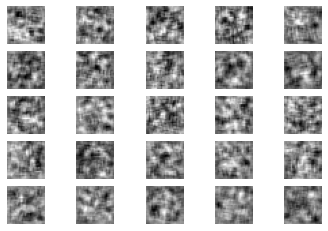

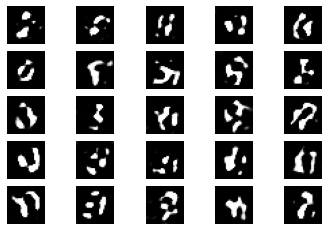

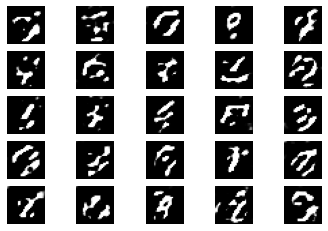

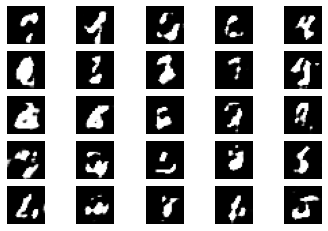

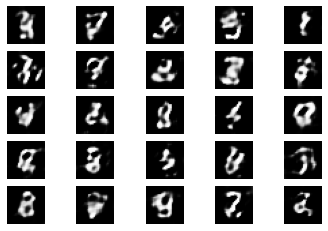

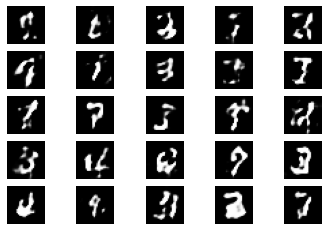

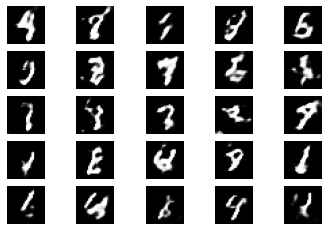

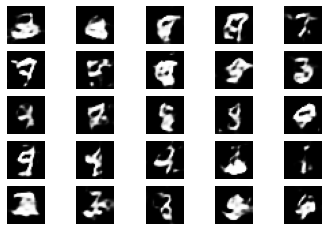

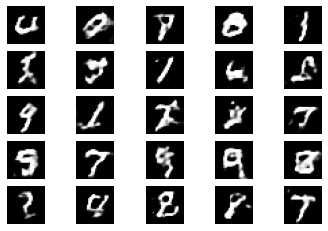

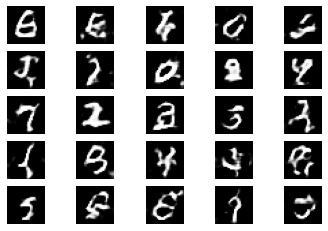

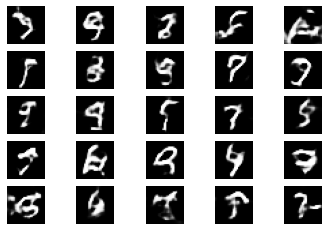

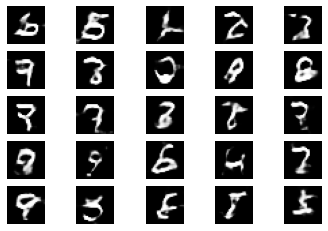

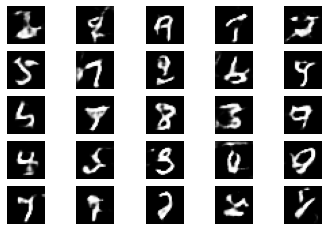

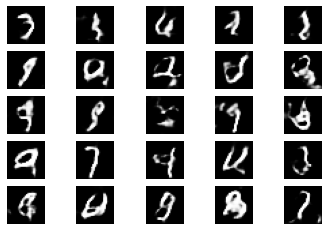

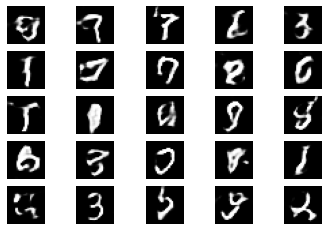

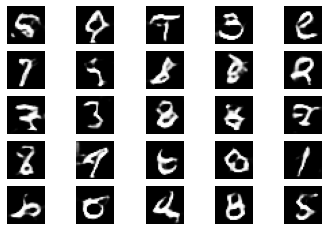

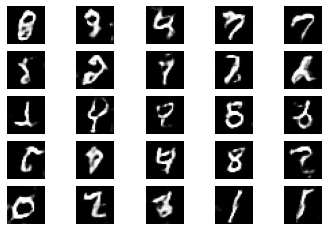

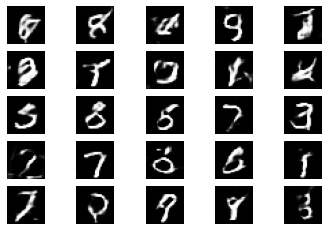

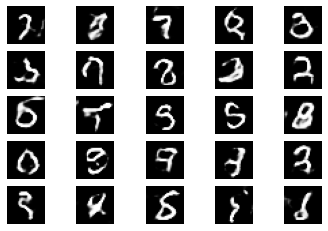

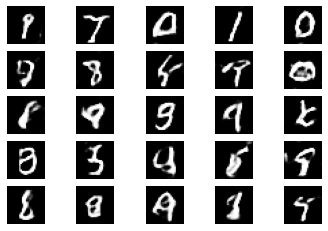

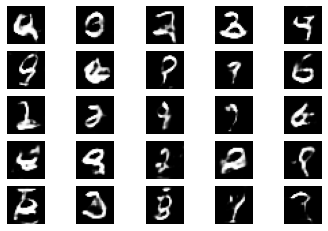

In [2]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.
